**Problem 1: Coordinate transformation:**  
- 2D transformation: Compute the coordinate of a 2D point p = (10, 20)T using a transformation of 
45 degrees about the x-axis, and a translation of t = (40, -30)T.  Answer/explain the following: 
  - What is the point representation in homogeneous coordinates? 
  - What is the rotation matrix 𝑅𝑅? 
  - What is the translation vector 𝑡𝑡? 
  - What is the full transformation matrix (consisting of 𝑅𝑅, 𝑡𝑡) that can be used to transform 
the homogeneous point coordinate?  
  - How do we apply this transformation to the point (in homogeneous coordinate form)? 
  - What is the coordinate of the transformed point, in homogeneous coordinates, and in 
the cartesian coordinates? 
- 3D transformation: A camera is located at point (0,-5,3) in the world frame.  The camera is tilted 
down by 30 degrees from the horizontal.  We want to find the 4x4 homogeneous 
transformation 𝐻𝐻𝑊𝑊 𝐶𝐶  from the world frame {W} to camera frame {C}. Note that in “the world” Z 
is up (X-Y ground plane) but in “the camera”, Z is out (X-Y image plane).   
 Answer/explain the following: 
  - What is 𝐻𝐻𝑊𝑊 𝐶𝐶 ? Explain how you computed it.
 
- Using transformation 𝐻𝐻𝑊𝑊 𝐶𝐶 , transform the point  𝑝𝑝 𝑊𝑊 =   (0,0,1) in the world frame to the 
camera frame. Hint: use the homogeneous coordinates of the point for this 
transformation. 
Notes:  
  - If you are not familiar with coordinate transformations, please take a look at the notes 
“Coordinate_Transforms.pdf” in the HW3 folder of course materials. 

In [11]:
import numpy as np


p_h = np.array([10, 20, 1])
print(f'Homogeneous Coordinates: {p_h}')

theta = np.deg2rad(45)
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
print(f'Rotation matrix: \n{R}')
t = np.array([40, -30])

print(f'Translation vector: {t}')
T = np.array([
    [R[0, 0], R[0, 1], t[0]],
    [R[1, 0], R[1, 1], t[1]],
    [0, 0, 1]
])
print(f'Transformation Matrix: \n{T}')
# Apply the transformation
p_h_transformed = T @ p_h

p_cartesian = p_h_transformed[:2]

print("Transformed point (homogeneous):", p_h_transformed)
print("Transformed point (cartesian):", p_cartesian)


Homogeneous Coordinates: [10 20  1]
Rotation matrix: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Translation vector: [ 40 -30]
Transformation Matrix: 
[[  0.70710678  -0.70710678  40.        ]
 [  0.70710678   0.70710678 -30.        ]
 [  0.           0.           1.        ]]
Transformed point (homogeneous): [32.92893219 -8.78679656  1.        ]
Transformed point (cartesian): [32.92893219 -8.78679656]


In [12]:
import numpy as np
# Rotation matrix around the X-axis by 30 degrees
alpha = np.deg2rad(30)

R_x = np.array([
    [1, 0, 0],
    [0, np.cos(alpha), -np.sin(alpha)],
    [0, np.sin(alpha), np.cos(alpha)]
])

R_z = np.array([
    [np.cos(alpha), -np.sin(alpha), 0],
    [np.sin(alpha), np.cos(alpha),0 ],
    [0, 0, 1]
])

R_y = np.array([
    [np.cos(alpha), 0, np.sin(alpha)],
    [0, 1, 0],
    [-np.sin(alpha), 0, np.cos(alpha)]
])
# Translation vector
t = np.array([0, -5, 3])

# Full homogeneous transformation matrix
H_W_C = np.array([
    [R_x[0, 0], R_x[0, 1], R_x[0, 2], t[0]],
    [R_x[1, 0], R_x[1, 1], R_x[1, 2], t[1]],
    [R_x[2, 0], R_x[2, 1], R_x[2, 2], t[2]],
    [0, 0, 0, 1]
])

print("Homogeneous transformation matrix H_W^C:")
print(H_W_C)

# Point in the world frame (homogeneous coordinates)
p_W = np.array([0, 0, 1, 1])

# Transform the point to the camera frame
p_C = H_W_C @ p_W

# Extract Cartesian coordinates from the homogeneous result
p_C_cartesian = p_C[:3]

print("Transformed point in camera frame (homogeneous):", p_C)
print("Transformed point in camera frame (cartesian):", p_C_cartesian)

Homogeneous transformation matrix H_W^C:
[[ 1.         0.         0.         0.       ]
 [ 0.         0.8660254 -0.5       -5.       ]
 [ 0.         0.5        0.8660254  3.       ]
 [ 0.         0.         0.         1.       ]]
Transformed point in camera frame (homogeneous): [ 0.        -5.5        3.8660254  1.       ]
Transformed point in camera frame (cartesian): [ 0.        -5.5        3.8660254]


**Problem 2: Camera calibration:**  
- Find the calibration/ intrinsic matrix of a camera (e.g., your cellphone camera).  Use the camera 
calibration board (print PDF file) provided in the HW3 folder. 
  - Provide a copy of your code in the report 
  - Display the images you took from the calibration board (at different angles/locations) 
  - After calibration, print out the camera intrinsic matrix 
  - Print out five distortion parameters, and explain what they are for. 
  - Print out camera extrinsic matrices for all of your images 
**Notes:**  
- For this problem, you can follow the camera calibration instructions at 
  - https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html 
  - https://www.geeksforgeeks.org/camera-calibration-with-python-opencv/ 
  
 
 


Number of images found: 5


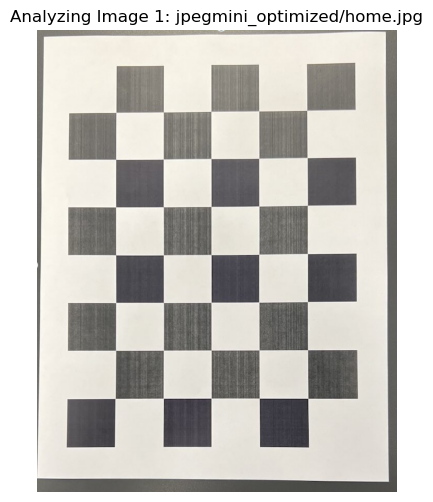

Chessboard corners found in jpegmini_optimized/home.jpg


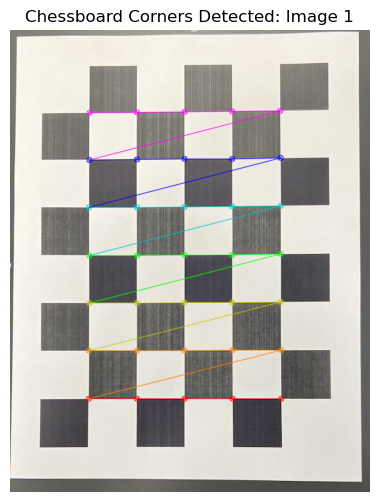

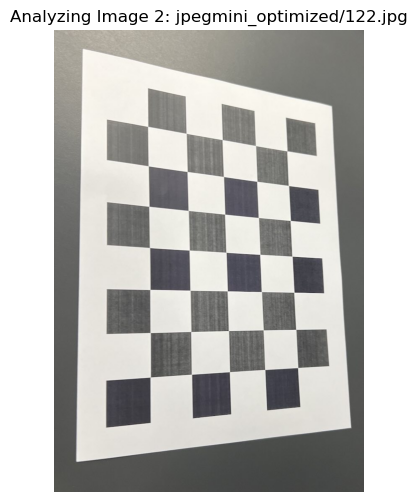

Chessboard corners found in jpegmini_optimized/122.jpg


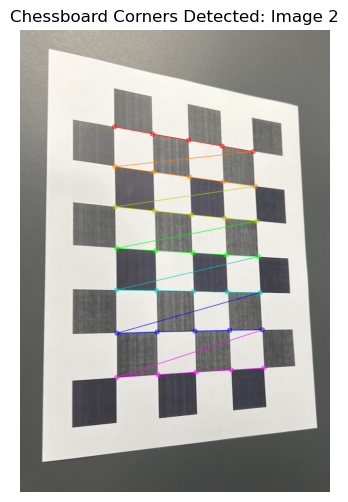

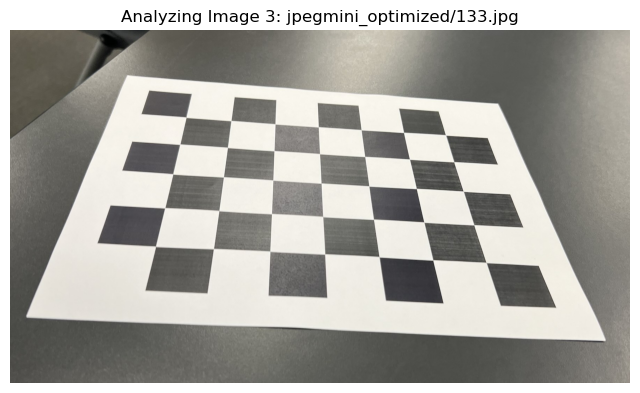

Chessboard corners found in jpegmini_optimized/133.jpg


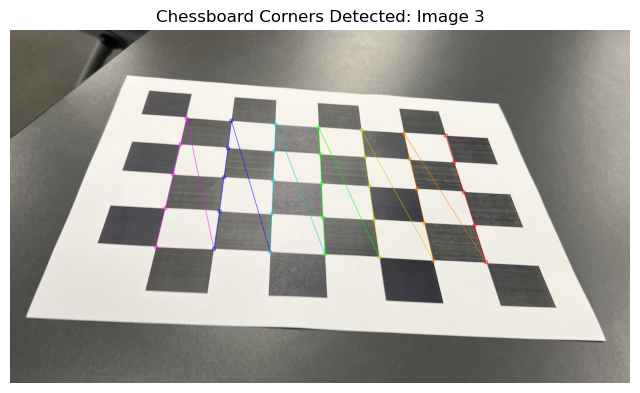

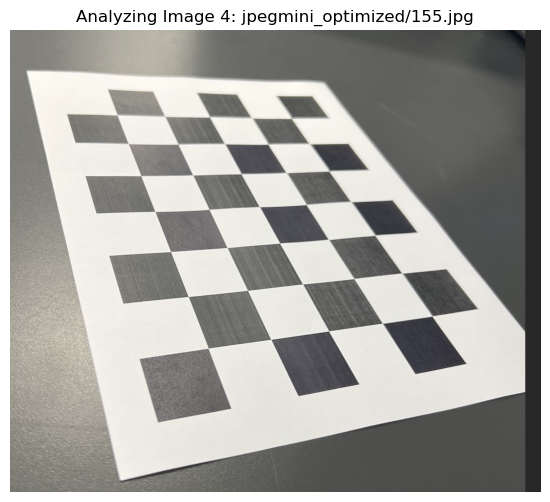

Chessboard corners found in jpegmini_optimized/155.jpg


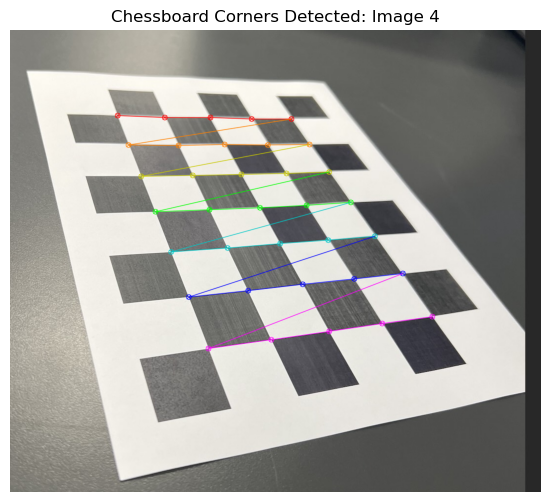

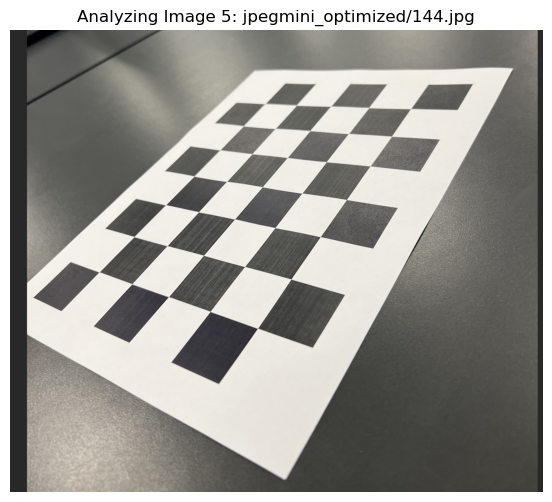

Chessboard corners found in jpegmini_optimized/144.jpg


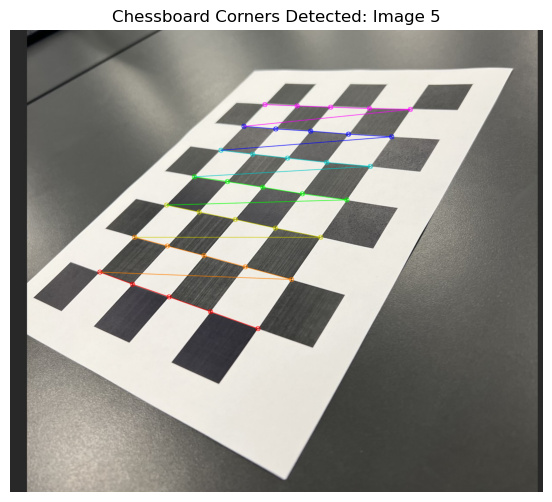


Camera Intrinsic Matrix:
[[1.44767283e+03 0.00000000e+00 6.41897637e+02]
 [0.00000000e+00 1.43824242e+03 4.98935413e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients (k1, k2, p1, p2, k3):
[-6.31880944e-01  3.45480779e+00 -4.50764893e-03 -9.04527605e-03
 -7.02877684e+00]

Extrinsic Matrices (Rotation and Translation) for each image:

Image 1:
Rotation Matrix:
[[-0.99968678 -0.00637128 -0.02420243]
 [ 0.00588886 -0.9997836   0.01995192]
 [-0.02432431  0.01980315  0.99950796]]
Translation Vector:
[[-1.23531416]
 [ 2.29515905]
 [15.1124642 ]]

Image 2:
Rotation Matrix:
[[ 0.80694651  0.059732   -0.58759631]
 [ 0.06534788  0.97973523  0.18933711]
 [ 0.58699829 -0.19118309  0.78669056]]
Translation Vector:
[[-4.22528489]
 [-2.72543307]
 [14.35980322]]

Image 3:
Rotation Matrix:
[[-0.08977124 -0.99596117  0.00157223]
 [ 0.68216168 -0.0603365   0.72870772]
 [-0.72566973  0.06648951  0.68482303]]
Translation Vector:
[[ 4.92564667]
 [-1.64563987]
 [11.34855805]]

Im

In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

# Define the correct checkerboard size (5x7 internal corners)
CHECKERBOARD = (5, 7)

# Prepare object points (3D points in real-world space)
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

# Load images from your folder
images = glob.glob('jpegmini_optimized/*.jpg')

print(f"Number of images found: {len(images)}")

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners with additional flags
    ret, corners = cv2.findChessboardCorners(
        gray, CHECKERBOARD, 
        cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE
    )

    # Plot the current image being analyzed
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Analyzing Image {i + 1}: {fname}')
    plt.axis('off')
    plt.show()

    if ret:
        print(f"Chessboard corners found in {fname}")
        objpoints.append(objp)  # Add object points
        imgpoints.append(corners)  # Add image points

        # Draw and display the corners for verification
        cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)

        # Display the image with drawn corners
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Chessboard Corners Detected: Image {i + 1}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to detect corners in {fname}")

# Ensure we have valid data before calibrating
if len(objpoints) > 0 and len(imgpoints) > 0:
    # Perform camera calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None
    )

    # Print the intrinsic matrix
    print("\nCamera Intrinsic Matrix:")
    print(mtx)

    # Print the distortion coefficients
    print("\nDistortion Coefficients (k1, k2, p1, p2, k3):")
    print(dist.ravel())

    # Print extrinsic matrices for each image
    print("\nExtrinsic Matrices (Rotation and Translation) for each image:")
    for i in range(len(rvecs)):
        R, _ = cv2.Rodrigues(rvecs[i])  # Convert rotation vector to matrix
        print(f"\nImage {i + 1}:")
        print("Rotation Matrix:")
        print(R)
        print("Translation Vector:")
        print(tvecs[i])

    # Calculate and print reprojection error
    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
        mean_error += error

    mean_error /= len(objpoints)
    print(f"\nMean Reprojection Error: {mean_error}")
else:
    print("Error: No valid chessboard corners found. Please check your images and try again.")


Explanation of Distortion Parameters:
1. k1, k2, k3: Radial distortion coefficients.
   - These parameters correct barrel and pincushion distortions, which cause straight lines to appear curved.
   - Barrel distortion: Image appears to bulge outward (common with wide-angle lenses).
   - Pincushion distortion: Image appears to pinch inward toward the center.

2. p1, p2: Tangential distortion coefficients.
   - Tangential distortion occurs when the lens and image sensor are not perfectly aligned.
   - These parameters correct the effect where the image looks tilted or shifted.


## Problem 3: Least-squares estimation

Suppose we have a quadrilateral ABCD and a transformed version A’B’C’D’ as seen in the image below.

Coordinates of points:
- **A** = (1, 1)  
- **B** = (1.5, 0.5)  
- **C** = (2, 1)  
- **D** = (2.5, 2)  

Transformed points:
- **A'** = (-0.9, 0.8)  
- **B'** = (-0.1, 1.3)  
- **C'** = (-0.4, 1.9)  
- **D'** = (-1.25, 2.55)  

### Task:
- Rewrite the transformation equation \( M \cdot X \approx X' \) by expanding the matrix multiplication.
- Construct an 8x4 matrix \( Q \) and an 8x1 column vector \( b \).
- Use `numpy.linalg.lstsq()` to solve for the matrix \( M \).


In [2]:
import numpy as np

# Original quadrilateral points (ABCD)
points_ABCD = np.array([
    [1, 1],      # A
    [1.5, 0.5],  # B
    [2, 1],      # C
    [2.5, 2]     # D
])

# Transformed points (A'B'C'D')
points_ApBpCpDp = np.array([
    [-0.9, 0.8],     # A'
    [-0.1, 1.3],     # B'
    [-0.4, 1.9],     # C'
    [-1.25, 2.55]    # D'
])

# Construct the Q matrix and b vector for least squares
Q = []  # 8x4 matrix
b = []  # 8x1 column vector

for (x, y), (x_prime, y_prime) in zip(points_ABCD, points_ApBpCpDp):
    # First equation for the current point pair
    Q.append([x, y, 0, 0])
    b.append(x_prime)

    # Second equation for the current point pair
    Q.append([0, 0, x, y])
    b.append(y_prime)

# Convert Q and b to numpy arrays
Q = np.array(Q)
b = np.array(b)

# Print Q and b matrices
print("Q matrix:")
print(Q)
print("\nb vector:")
print(b)

# Solve for the transformation matrix M using least squares
M_vector, residuals, rank, s = np.linalg.lstsq(Q, b, rcond=None)

# Reshape M_vector (1D array) into a 2x2 matrix
M = M_vector.reshape(2, 2)

# Print the resulting 2x2 transformation matrix
print("\nTransformation Matrix M:")
print(M)

# Calculate and print the residual (least squares error)
print(f"\nResidual (Least Squares Error): {residuals}")


Q matrix:
[[1.  1.  0.  0. ]
 [0.  0.  1.  1. ]
 [1.5 0.5 0.  0. ]
 [0.  0.  1.5 0.5]
 [2.  1.  0.  0. ]
 [0.  0.  2.  1. ]
 [2.5 2.  0.  0. ]
 [0.  0.  2.5 2. ]]

b vector:
[-0.9   0.8  -0.1   1.3  -0.4   1.9  -1.25  2.55]

Transformation Matrix M:
[[ 0.332  -1.0808]
 [ 0.876   0.1256]]

Residual (Least Squares Error): [0.092]


## Problem 4: Panorama

Panoramic photography is a technique that combines multiple images captured by a rotating camera into a single, wide photo. The task is to write an algorithm that stitches the images together.

![Panorama Example](./Screenshot%202024-10-21%20at%2012.47.02%20PM.png)

### Steps:
1. **Load the images**: Use the provided images `filed1.jpg` through `filed8.jpg`.
2. **Downsample** by a factor of 5 or more to speed up the process.
3. **Detect and match SIFT features** using Lowe’s threshold of 0.7 for consecutive image pairs.
4. **Compute homographies** between matched image pairs using RANSAC.
5. **Warp all images** onto one base perspective using `cv2.warpPerspective()`.
6. **Combine images** into the panorama and display the result.


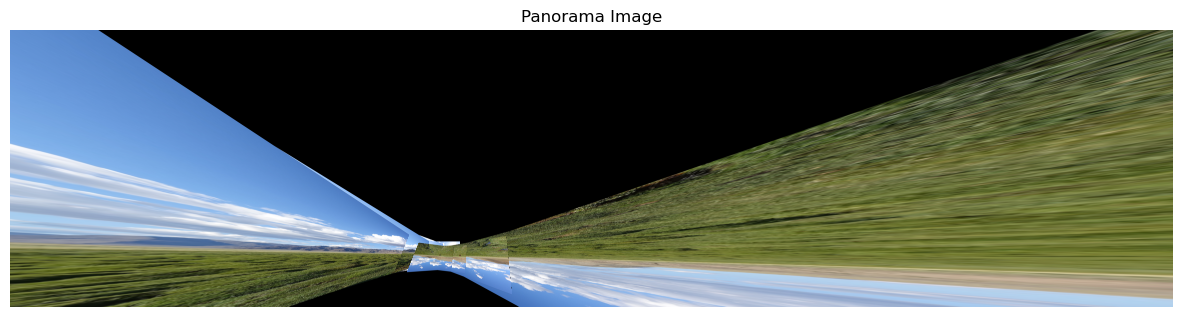

In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def find_homographies(images):
    """
    Compute homographies from each image to the first image.
    """
    homographies = [np.eye(3)]  # Identity matrix for the first image

    for i in range(1, len(images)):
        keypoints1, descriptor1, keypoints2, descriptor2 = get_keypoint(images[i - 1], images[i])
        matches = match_keypoints(descriptor1, descriptor2)

        if len(matches) < 10:
            raise ValueError(f"Not enough matches between image {i-1} and {i}.")

        # Extract matching points
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

        # Find homography from image i to image i-1
        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Update cumulative homography to align with the first image
        homographies.append(homographies[-1] @ H)

    return homographies

def warp_images_to_base(images, homographies, base_idx=0):
    """
    Warp all images to the perspective of the base image (first image).
    """
    base_img = images[base_idx]
    h_base, w_base = base_img.shape[:2]

    # Find the canvas size by transforming all corners
    corners = []
    for i, img in enumerate(images):
        h, w = img.shape[:2]
        corners_img = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
        transformed_corners = cv2.perspectiveTransform(corners_img, homographies[i])
        corners.append(transformed_corners)

    # Calculate the canvas size
    all_corners = np.concatenate(corners, axis=0)
    [x_min, y_min] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(all_corners.max(axis=0).ravel() + 0.5)

    # Create the final canvas
    canvas_width, canvas_height = x_max - x_min, y_max - y_min
    canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    # Warp all images to the base perspective and place them on the canvas
    for i, img in enumerate(images):
        translation_matrix = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])
        warped_img = cv2.warpPerspective(img, translation_matrix @ homographies[i], (canvas_width, canvas_height))

        # Use a mask to blend images onto the canvas
        mask = (warped_img > 0)
        canvas[mask] = warped_img[mask]

    return canvas

def get_keypoint(img1, img2):
    """Detect SIFT keypoints and descriptors."""
    sift = cv2.SIFT_create()
    keypoints1, descriptor1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2, None)
    return keypoints1, descriptor1, keypoints2, descriptor2

def match_keypoints(descriptor1, descriptor2):
    """Match SIFT keypoints using BFMatcher."""
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptor1, descriptor2)
    good_matches = sorted(matches, key=lambda x: x.distance)[:50]
    return good_matches

def load_images_from_folder(folder):
    """Load images from a folder as numpy arrays."""
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(os.path.join(folder, filename)).convert('RGB')
            images.append(np.array(img))
    return images

def show_image(image, title='Panorama'):
    """Display an image using matplotlib."""
    plt.figure(figsize=(15, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

def save_image(image, filename='panorama.jpg'):
    """Save the final image using Pillow."""
    img = Image.fromarray(image.astype('uint8'))
    img.save(filename)

if __name__ == "__main__":
    # Load all images from the 'panorama' folder
    images = load_images_from_folder('panorama')
    assert len(images) > 1, "Need at least two images to stitch."

    try:
        # Compute homographies for all images relative to the base image
        homographies = find_homographies(images)

        # Warp all images onto the base image's perspective
        panorama = warp_images_to_base(images, homographies)

    except ValueError as e:
        print(f"Error stitching images: {e}")
        exit(1)

    # Display and save the final panorama
    show_image(panorama, title='Panorama Image')
    save_image(panorama, 'panorama.jpg')


## Problem 5: 3D Reconstruction

Given two images named `left.jpg` and `right.jpg`, implement an algorithm to reconstruct 3D points by matching SIFT feature points.



### Camera Intrinsic Matrix:
\[
f = 1000, \quad c_x = 1024, \quad c_y = 768
\]
\[
K = \begin{bmatrix}
f & 0 & c_x \\
0 & f & c_y \\
0 & 0 & 1
\end{bmatrix}
\]

### Steps:
1. **Load images** and extract SIFT features.
2. **Match features** using Lowe’s threshold of 0.7.
3. **Find the fundamental/essential matrix** using RANSAC and print it.
4. **Show matched inlier points** connected by lines.
5. **Recover rotation and translation** between camera views.
6. **Reconstruct 3D points via triangulation** and display them.


* Fundamental Matrix (F) = 
[[ 8.08356490e-08  3.22312344e-07 -8.65304246e-04]
 [ 4.68171888e-07 -3.94663670e-08 -5.01658203e-03]
 [-9.22583450e-05  4.32865612e-03  1.00000000e+00]]
* Number of inliers = 1191


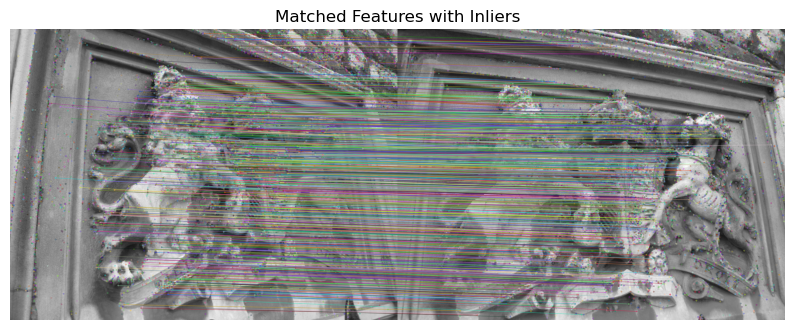

* Essential Matrix (E) = 
[[ 0.08083565  0.32231234 -0.53499266]
 [ 0.46817189 -0.03946637 -4.56748418]
 [ 0.35007337  4.62839379  0.17427502]]
* Rotation (R) = 
[[ 0.98410212  0.03946701  0.17316288]
 [-0.04045617  0.99917892  0.00218518]
 [-0.17293445 -0.00915594  0.98489078]]
* Translation (t) = 
[[-0.99046257]
 [ 0.11868394]
 [ 0.06998591]]


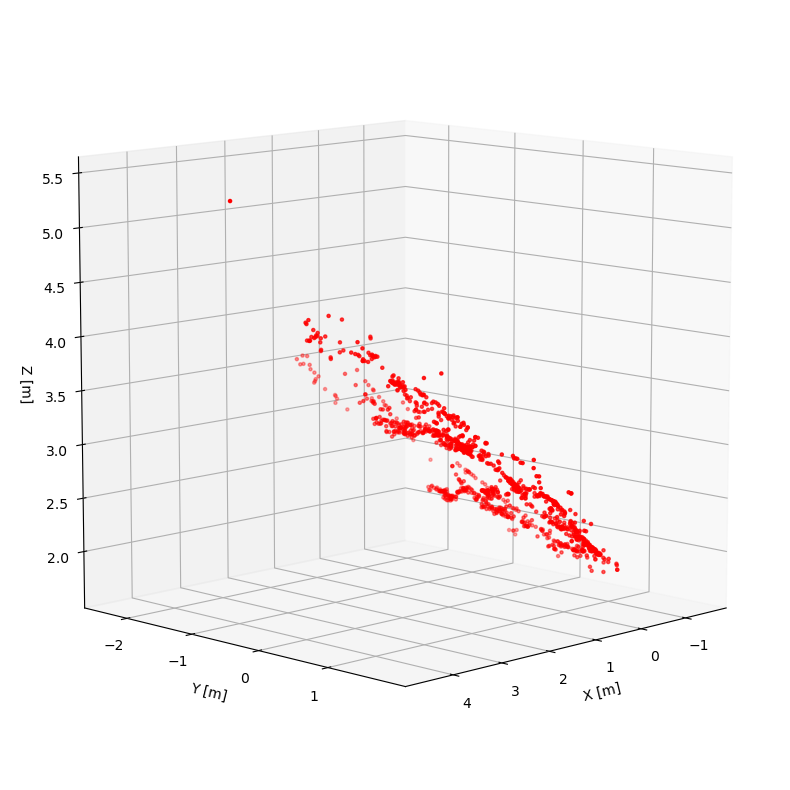

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_keypoint(left_img, right_img):
    sift = cv2.SIFT_create()
    key_points1, descriptor1 = sift.detectAndCompute(left_img, None)
    key_points2, descriptor2 = sift.detectAndCompute(right_img, None)
    return key_points1, descriptor1, key_points2, descriptor2

def match_keypoints(descriptor1, descriptor2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)
    good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]
    return good_matches

if __name__ == "__main__":
    # Load images
    img1 = cv2.imread('twoview/left.jpg', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread('twoview/right.jpg', cv2.IMREAD_GRAYSCALE)
    assert img1 is not None and img2 is not None, 'Cannot read given images'

    f, cx, cy = 1000, 1024, 768
    K = np.array([[f, 0, cx], [0, f, cy], [0, 0, 1]])

    key_points1, descriptor1, key_points2, descriptor2 = get_keypoint(img1, img2)
    good_matches = match_keypoints(descriptor1, descriptor2)

    pts1 = np.float32([key_points1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([key_points2[m.trainIdx].pt for m in good_matches])

    F, inlier_mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC, 1.0, 0.99)
    print(f'* Fundamental Matrix (F) = \n{F}')
    print(f'* Number of inliers = {np.sum(inlier_mask)}')

    # Draw matches with inliers only
    img_matches = cv2.drawMatches(
        img1, key_points1, img2, key_points2, good_matches, None,
        matchesMask=inlier_mask.ravel().tolist()
    )

    # Display the matched images using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title('Matched Features with Inliers')
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    E = K.T @ F @ K
    print(f'* Essential Matrix (E) = \n{E}')
    _, R, t, _ = cv2.recoverPose(E, pts1, pts2, K)
    print(f'* Rotation (R) = \n{R}')
    print(f'* Translation (t) = \n{t}')

    P0 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))
    P1 = K @ np.hstack((R, t))

    pts1_inlier = pts1[inlier_mask.ravel() == 1]
    pts2_inlier = pts2[inlier_mask.ravel() == 1]

    X = cv2.triangulatePoints(P0, P1, pts1_inlier.T, pts2_inlier.T)
    X /= X[3]
    X = X.T

    # Plot the 3D points using matplotlib
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='o', s=5)

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('Z [m]')
    ax.grid(True)
    ax.view_init(elev=10, azim=45)

    plt.tight_layout()
    plt.show()
